In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from components.MiniBatchGradient import MiniBatchGradient

In [2]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, 
    iris.target, 
    test_size=0.2,
    random_state=0
)

Begin training...
e1(err=40.2045147434977, acc=0.37)
e101(err=39.93736374826302, acc=0.37)
e201(err=39.93176846037321, acc=0.37)
e301(err=39.92522334202909, acc=0.37)
e401(err=39.91615078699006, acc=0.37)
e501(err=39.90147839441488, acc=0.37)
e601(err=39.873893051581064, acc=0.37)
e701(err=39.81176777971768, acc=0.37)
e801(err=39.62651279454789, acc=0.37)
e901(err=38.649412244616215, acc=0.37)
e1001(err=28.4400750877359, acc=0.69)
e1101(err=20.92220338211889, acc=0.69)
e1201(err=18.174392133780074, acc=0.82)
e1301(err=14.141628222402915, acc=0.92)
e1401(err=9.689497727541827, acc=0.96)
e1501(err=6.687147067819544, acc=0.97)
e1601(err=5.093791821505418, acc=0.97)
e1701(err=4.238127736031182, acc=0.96)
e1801(err=3.751919378802106, acc=0.97)
e1901(err=3.454337319516213, acc=0.97)
e2000(err=3.2725806218830074, acc=0.97)

Training done!!
Accuracy :  0.9666666666666667
[2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0]


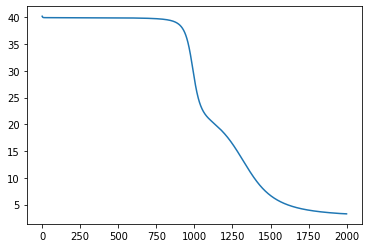

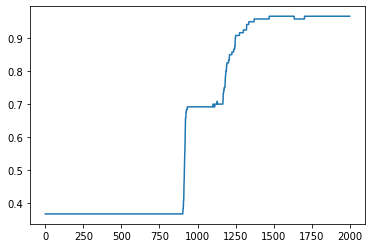

0.4885325

In [6]:
mbg = MiniBatchGradient([4, 5, 5, 5, 3], 1)
trainTarget = []
for target in y_train:
  if target == 0 :
    trainTarget.append([1, 0, 0])
  elif target == 1 :
    trainTarget.append([0, 1, 0])
  elif target == 2 :
    trainTarget.append([0, 0, 1])

print("Begin training...")
result = mbg.train(X_train, trainTarget, 2000, 0.01, 0.01)
print("\nTraining done!!")
predicted = mbg.predict(X_test)
accuracy = 0
for i in range(len(predicted)):
  if predicted[i] == y_test[i]:
    accuracy += 1
print("Accuracy : ", accuracy/len(X_test))
print(predicted)
# print(X_test)

plt.plot(result["err"])
plt.show()
plt.plot(result["acc"])
plt.show()
mbg.calcTotalError([0.123, 0.456], [1, 0])


In [4]:
from sklearn.neural_network import MLPClassifier

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
dataset = df.to_numpy()

numOfInputLayer = len(dataset[0]) - 1
numOfHiddenLayer = 3
outputLayer = len(set([data[-1] for data in dataset]))

learningRate = 0.1
batchSzie = 32
numOfEpoch = 1000
numOfOutputLayer = outputLayer 

classifier = MLPClassifier(
    hidden_layer_sizes=(numOfHiddenLayer), 
    max_iter=numOfEpoch, 
    activation='logistic', 
    solver='sgd', 
    batch_size=batchSzie, 
    learning_rate_init=learningRate,
    random_state=1
)

classifier.fit(iris.data, iris.target)
sklearnResult = classifier.predict(iris.data)

numOfCorrectTarget = 0
for i in range(len(sklearnResult)):
	if (sklearnResult[i] == iris.target[i]):
		numOfCorrectTarget += 1
 
print("Sklearn Result\n****************************************************")
print('Num of Data          : ' + str(len(dataset)))
print('Accuracy             : ' + str(numOfCorrectTarget/len(dataset)))

Sklearn Result
****************************************************
Num of Data          : 150
Accuracy             : 0.9466666666666667
